In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
class Model:
    def __init__(self):
        self.W =tf.Variable(16.0)
        self.b =tf.Variable(10.0)
        
    def __call__(self , x):
        return self.W*x + self.b
    
    

In [5]:
model = Model()
model(20)

<tf.Tensor: id=19, shape=(), dtype=float32, numpy=330.0>

In [7]:
TRUE_W = 3.0 #trueslope
TRUE_b = 0.5 #truebias

NUM_EXAMPLES = 1000

X= tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y= X*TRUE_W + TRUE_b + noise




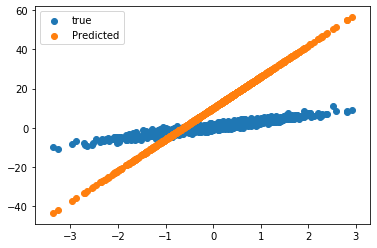

In [8]:
plt.scatter(X,y,label="true")
plt.scatter(X,model(X),label="Predicted")
plt.legend()


In [9]:
def loss(y,y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))


In [10]:
def train(model , X ,y ,lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y,model(X))
        
    dW , db = t.gradient(current_loss , [model.W , model.b])
    model.W.assign_sub(lr*dW)
    model.b.assign_sub(lr*db)
    
    

In [11]:
model = Model()
Ws , bs = [],[]
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    
    curr_loss = loss(y,model(X))
    
    train(model , X , y , lr=0.1)
    print(f"Epoch {epoch} : Loss : {curr_loss.numpy()}")
    


Epoch 0 : Loss : 262.3202209472656
Epoch 1 : Loss : 167.96522521972656
Epoch 2 : Loss : 107.67516326904297
Epoch 3 : Loss : 69.1512222290039
Epoch 4 : Loss : 44.5350227355957
Epoch 5 : Loss : 28.805500030517578
Epoch 6 : Loss : 18.75436019897461
Epoch 7 : Loss : 12.33162784576416
Epoch 8 : Loss : 8.227421760559082
Epoch 9 : Loss : 5.604752540588379
Epoch 10 : Loss : 3.92879581451416
Epoch 11 : Loss : 2.857802152633667
Epoch 12 : Loss : 2.1733920574188232
Epoch 13 : Loss : 1.7360202074050903
Epoch 14 : Loss : 1.4565151929855347
Epoch 15 : Loss : 1.27789306640625
Epoch 16 : Loss : 1.1637407541275024
Epoch 17 : Loss : 1.0907881259918213
Epoch 18 : Loss : 1.0441651344299316
Epoch 19 : Loss : 1.0143686532974243


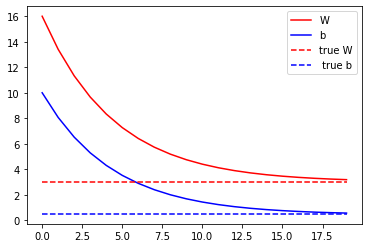

In [12]:
plt.plot(range(epochs),Ws , 'r', range(epochs),bs,'b')
plt.plot([TRUE_W]*epochs , 'r--' , [TRUE_b]*epochs , 'b--')
plt.legend(['W','b','true W', ' true b'])
plt.show()


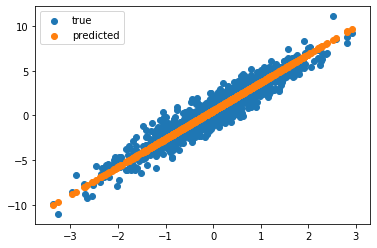

In [13]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()